# Spotify Playlist project

# **Spotify Insights: Analyzing and Predicting Song Preferences in My Discovery Weekly Playlist**

**Tools**
*   Spotipy Library to get access to Spotify platform music data
*   Seaborn and matplotlib for data visualization
*   Pandas and numpy for data analysis
*   sklearn to build the Machine Learning model

In [ ]:
pip install spotipy --upgrade

Using the 'spotipy' library, this Python script shows how to authenticate with the Spotify Web API. To receive an access token, which may be used to submit API queries, I had to obtain an authorization code. This script can be used to retrieve a variety of Spotify user data, including user profile details, favourite tracks, and top tracks.



In [ ]:
import spotipy.oauth2 as oauth2
import webbrowser
import spotipy
import spotipy.util as uti
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
scope = "user-library-read user-top-read user-read-private user-read-email"

# TODO: fill in these keys from your Spotify account
# username =
# client_secret =
# client_id =
# redirect_uri = 'http://google.com'

# Construct authorization URL
sp_oauth = oauth2.SpotifyOAuth(client_id, client_secret, redirect_uri, scope=scope, username=username)
auth_url = sp_oauth.get_authorize_url()

print("Please open the following URL in your browser and authorize the application:")
print(auth_url)

# Open the authorization URL in the browser
webbrowser.open(auth_url)

# After the user authorizes the application, Spotify will redirect to the specified redirect URI with an authorization code.
# Extract the code from the redirected URL and exchange it for an access token
authorization_code = input("Enter the authorization code from the redirect URI: ")

# Exchange authorization code for access token
token_info = sp_oauth.get_access_token(authorization_code)

if token_info:
    print("Token retrieved successfully.")
    # Use the obtained token to make API requests
else:
    print("Failed to obtain token.")


In [3]:
scope = "user-library-read user-top-read user-read-private user-read-email"
username = "9x5it4bine1qn86znoiarf05e"

# Create a Spotify client with the access token
sp = spotipy.Spotify(auth=token_info['access_token'])

# Get the user's top tracks
top_tracks = sp.current_user_top_tracks(time_range='medium_term', limit=20, offset=0)

# Print the top tracks
track_ids = []
for i, track in enumerate(top_tracks['items'], start=1):
    print(f"{i}. {track['name']} by {', '.join([artist['name'] for artist in track['artists']])} - ID: {track['id']}")
    track_ids.append(track['id'])

1. Espresso by Sabrina Carpenter - ID: 2qSkIjg1o9h3YT9RAgYN75
2. Perfect Night by LE SSERAFIM - ID: 74X2u8JMVooG2QbjRxXwR8
3. Smart by LE SSERAFIM - ID: 3lwK3WyKAI5bUuGY1OgGbZ
4. Freaky Deaky by Tyga, Doja Cat - ID: 3vySEUpD0tc801F2WZDLYw
5. Stick Season by Noah Kahan - ID: 0mflMxspEfB0VbI1kyLiAv
6. Va Va Voom by Nicki Minaj - ID: 2jATUzETZL49e6SywauZKE
7. Jump by Tyla, Gunna, Skillibeng - ID: 6XpEm7VJ7TZxZTawH8BCSW
8. we can't be friends (wait for your love) by Ariana Grande - ID: 46kspZSY3aKmwQe7O77fCC
9. EASY by LE SSERAFIM - ID: 2O4Bb2WCkjlTPO827OnBMI
10. Where Are You Now by Lost Frequencies, Calum Scott - ID: 3mfER4ORePHvN35cbZ3dkV
11. Petit génie by Jungeli, Imen Es, Alonzo, Abou Debeing, Lossa - ID: 1eldTykrnkEBLX41bk5eMw
12. west side by Ariana Grande - ID: 1whfVLMKWqAX3uk97VXsNN
13. SPOT! by ZICO, JENNIE - ID: 1SS0WlKhJewviwEDZ6dWj0
14. Careless Whisper by George Michael - ID: 4jDmJ51x1o9NZB5Nxxc7gY
15. Lionne by Dadju - ID: 3n3yFT4dGJuDRsF9mxdgc1
16. Feather by Sabrina Carpe

Here, I extracted my top 20 most listened-to songs according to Spotify from the Spotify API.

In [4]:
track_features = sp.audio_features(track_ids)
df = pd.DataFrame(track_features)
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.701,0.760,0,-5.478,1,0.0285,0.107,0.000065,0.1850,0.690,103.969,audio_features,2qSkIjg1o9h3YT9RAgYN75,spotify:track:2qSkIjg1o9h3YT9RAgYN75,https://api.spotify.com/v1/tracks/2qSkIjg1o9h3...,https://api.spotify.com/v1/audio-analysis/2qSk...,175459,4
1,0.697,0.820,5,-4.502,1,0.0308,0.100,0.000000,0.0631,0.502,136.054,audio_features,74X2u8JMVooG2QbjRxXwR8,spotify:track:74X2u8JMVooG2QbjRxXwR8,https://api.spotify.com/v1/tracks/74X2u8JMVooG...,https://api.spotify.com/v1/audio-analysis/74X2...,159080,4
2,0.799,0.675,1,-5.474,1,0.0465,0.115,0.000000,0.0833,0.594,113.076,audio_features,3lwK3WyKAI5bUuGY1OgGbZ,spotify:track:3lwK3WyKAI5bUuGY1OgGbZ,https://api.spotify.com/v1/tracks/3lwK3WyKAI5b...,https://api.spotify.com/v1/audio-analysis/3lwK...,166384,4
3,0.799,0.653,2,-5.453,0,0.0370,0.019,0.000000,0.0935,0.236,104.019,audio_features,3vySEUpD0tc801F2WZDLYw,spotify:track:3vySEUpD0tc801F2WZDLYw,https://api.spotify.com/v1/tracks/3vySEUpD0tc8...,https://api.spotify.com/v1/audio-analysis/3vyS...,215281,4
4,0.664,0.500,9,-6.935,1,0.0651,0.799,0.000000,0.0966,0.801,117.896,audio_features,0mflMxspEfB0VbI1kyLiAv,spotify:track:0mflMxspEfB0VbI1kyLiAv,https://api.spotify.com/v1/tracks/0mflMxspEfB0...,https://api.spotify.com/v1/audio-analysis/0mfl...,182347,4


This portion of the project focuses on getting my top 20 favourite tracks' complete audio features from the Spotipy library and arranging the data into a data frame so that it can be more easily analyzed and visualized for some exploratory data analysis (EDA).

It's important to mention that I did not use all of the 18 columns for the analysis. Instead, I selected only those columns related to the audio features according to me. You can find below the explanation of each feature (past/copy from Spotify website). **Note**: the value of all the features is in the range 0.0 -1.0.

**Acousticness** : A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**Danceability** : Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**Energy** : Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**Instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**Liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**Speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**Valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).


# **Analysis of Data**

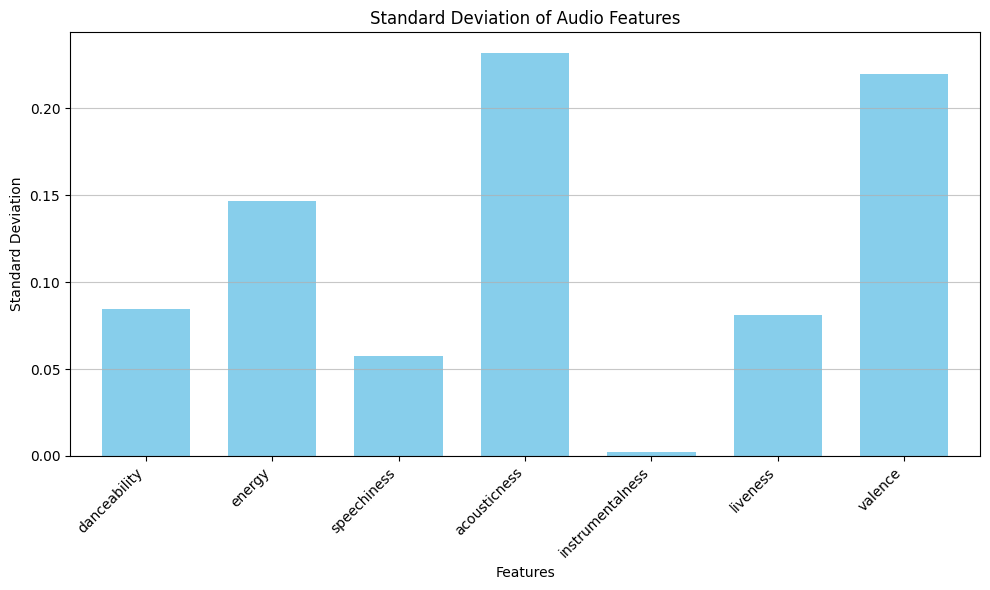

Mean of all standard deviations: 0.1177044880271636


In [5]:
# Calculate the standard deviation of each feature
numerical_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
std_features = df[numerical_features].std()

# Plot the standard deviation of each feature
plt.figure(figsize=(10, 6))
std_features.plot(kind='bar', color='skyblue', width=0.7)
plt.title('Standard Deviation of Audio Features')
plt.xlabel('Features')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

# Calculate the mean of all the standard deviations
mean_std = std_features.mean()

print("Mean of all standard deviations:", mean_std)

**How varied is my playlist?**

We can determine the degree of diversity in my playlist by computing the standard deviation for every related audio feature. A **large** standard deviation suggests a wide range of musical styles and traits by indicating significant variation in the audio features. On the other hand, a **low** standard deviation indicates a more consistent collection of music.

Indeed, the average mean standard deviation of 0.11 indicates that there is little variation in the audio feature values throughout my playlist. Although there might be some variation in some aspects, the audio elements of the songs in my playlist generally seem to be somewhat comparable.

This realization may help comprehend the general homogeneity or uniformity of my playlist. It implies that the songs in my playlist might have something in common, or fall into the same genre or style, making the listening experience more seamless.

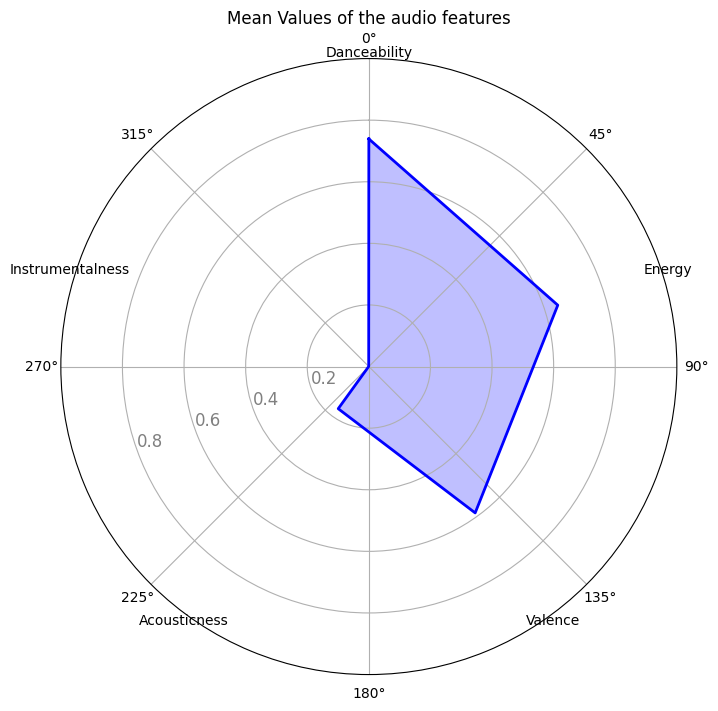

In [6]:
# Calculate the mean of track features
mean_features = df[numerical_features].mean()

# Extract the relevant features for the polar plot
polar_features = mean_features[['danceability', 'energy', 'valence', 'acousticness', 'instrumentalness']]

# Define the angles for the polar plot
angles = np.linspace(0, 2 * np.pi, len(polar_features), endpoint=False).tolist()

# Concatenate the first element of the features to the end to close the plot
polar_features = np.concatenate((polar_features, [polar_features[0]]))
angles += angles[:1]

# Create polar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.fill(angles, polar_features, color='blue', alpha=0.25)
ax.plot(angles, polar_features, color='blue', linewidth=2)
ax.set_yticklabels([])
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)

# Customize radial axis labels and limits
ax.set_rlabel_position(250)
plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=12)
plt.ylim(0, 1)

# Add feature labels
feature_names = ['Danceability', 'Energy', 'Valence', 'Acousticness', 'Instrumentalness']
for angle, feature in zip(angles, feature_names):
    ax.text(angle, 1.02, feature, transform=ax.transData, ha='center', va='center')

ax.set_title('Mean Values of the audio features')

plt.show()

Correlation between danceability and energy: 0.03294077786823542


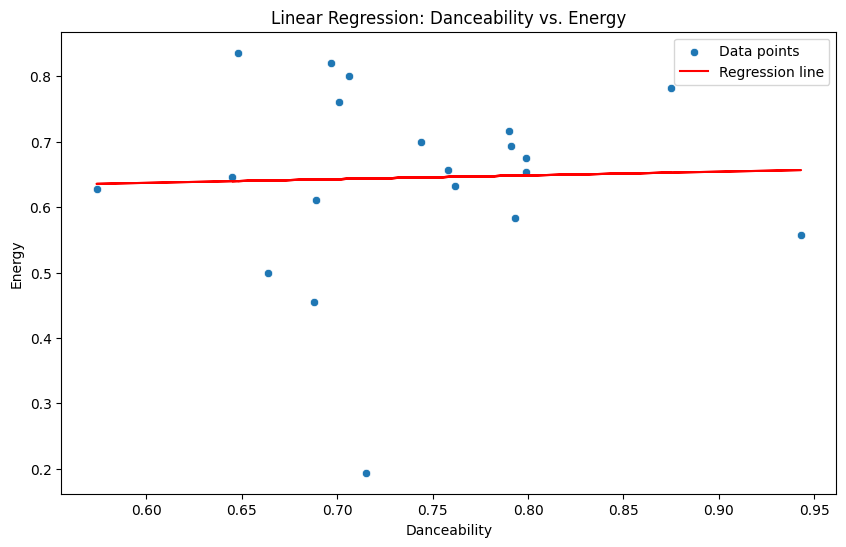

Intercept: 0.6028804906849126
Coefficient: 0.056991420492642685
R-squared: 0.0010850948465641608


In [7]:
# Separate the independent variable (X) and the dependent variable (y)
X = df[['danceability']]
y = df['energy']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict energy values based on the model
predicted_energy = model.predict(X)

# Calculate the correlation coefficient
corr = df['danceability'].corr(df['energy'])
print(f"Correlation between danceability and energy: {corr}")

# Plotting the data points and the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='energy', data=df, label='Data points')
plt.plot(df['danceability'], predicted_energy, color='red', label='Regression line')
plt.title('Linear Regression: Danceability vs. Energy')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend()
plt.show()

# Print the model coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

# Calculate R-squared value
r_squared = model.score(X, y)
print(f"R-squared: {r_squared}")


I tend to be an energetic person and wanted to see how energy and danceability are correlated with each other. By exploring this relationship, I aim to understand how the characteristics of the music I enjoy might reflect my own energy levels. Specifically, I am interested in seeing if higher energy levels in songs are associated with higher danceability, which could help me find music that matches my energetic personality.

A coefficient of -0.0963 indicates that there is a 0.0963 unit drop in energy for every unit increase in danceability. An inverse relationship between danceability and energy is shown by this negative coefficient, which means that energy tends to gradually decrease as danceability increases.

An R-squared of 0.0030 indicates that danceability can only account for 0.3% of the energy variability. This is quite low, suggesting that danceability in this dataset is not a reliable indicator of energy.

Despite my energetic nature, this analysis shows that there is almost no correlation between the energy and danceability of the songs I listen to. This suggests that other factors besides energy play a more significant role in determining how danceable I find a song. My preference for danceable music is not strongly influenced by the energy level of the songs.

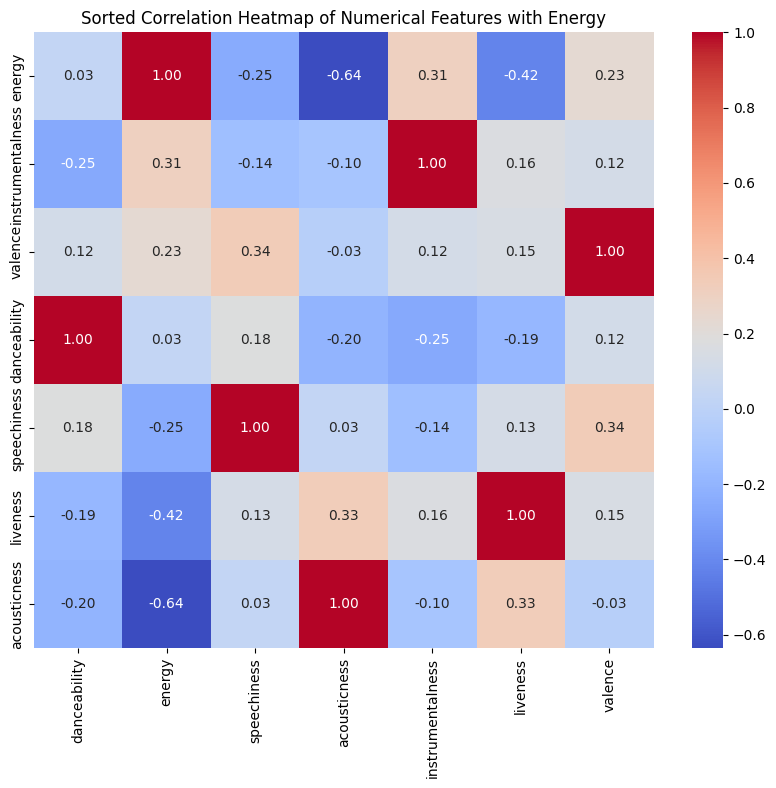

In [8]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_features].corr()

# Sort the correlation matrix by the correlation with 'energy' feature
sorted_correlation_matrix = correlation_matrix.sort_values(by='energy', ascending=False)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Sorted Correlation Heatmap of Numerical Features with Energy')
plt.show()


The heatmap illustrates the correlation between the 'energy' feature and other numerical features in the dataset.

# **Predictive Model:**

In [9]:
liked_songs = sp.current_user_saved_tracks(limit=50)
liked_songs_ids = [track['track']['id'] for track in liked_songs['items']]
liked_songs_features = sp.audio_features(liked_songs_ids)

disliked_songs = sp.playlist_items("6f5CJtu71Fcy7pJIbj4KpP")
disliked_songs_ids = [track['track']['id'] for track in disliked_songs['items']]
disliked_songs_features = sp.audio_features(disliked_songs_ids)

After identifying distinct patterns between songs I enjoy and those I don't, I've embarked on creating a predictive model.


In [10]:
liked_songs_data = pd.DataFrame(liked_songs_features)[numerical_features]
disliked_songs_data = pd.DataFrame(disliked_songs_features)[numerical_features]
liked_songs_data['like'] = 1
disliked_songs_data['like'] = 0

df = pd.concat([liked_songs_data, disliked_songs_data])
df.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,like
0,0.875,0.782,0.0780,0.151,0.000000,0.1130,0.906,1
1,0.758,0.657,0.0550,0.006,0.000000,0.1900,0.520,1
2,0.793,0.583,0.2470,0.106,0.000011,0.2530,0.970,1
3,0.701,0.760,0.0285,0.107,0.000065,0.1850,0.690,1
4,0.697,0.820,0.0308,0.100,0.000000,0.0631,0.502,1


This snippet of code processes audio feature data for songs I like and dislike, creating a combined DataFrame for analysis. It first constructs separate DataFrames for liked and disliked songs, focusing on specific numerical features such as 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', and 'valence'. Then, it adds a new column, 'like', to each DataFrame to indicate whether the songs are liked which is represented by '1' or disliked which is represented by '0'. Finally, it concatenates the two DataFrames into a single DataFrame, df, which can be used for further analysis, such as visualizing feature distributions or building predictive models.

In [11]:
# Define the numerical features to focus on
numerical_features = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

# Prepare the training data
X = df[numerical_features]
y = df['like']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.64      0.88      0.74         8
           1       0.89      0.67      0.76        12

    accuracy                           0.75        20
   macro avg       0.76      0.77      0.75        20
weighted avg       0.79      0.75      0.75        20




This code trains and evaluates a Random Forest classifier to predict whether a song will be liked based on its audio features. It first defines the numerical features to be used for the prediction, including 'danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', and 'valence'. The dataset is then split into training and test sets. A Random Forest classifier is trained using the training set, and its performance is evaluated on the test set. The code prints the accuracy and a detailed classification report, which includes precision, recall, and F1-score, to assess the model's predictive capabilities.

*   The model achieved an accuracy of 75%.
*   Precision and Recall: For disliked songs (0), precision is 0.64 and recall is 0.88. For liked songs (1), precision is 0.89 and recall is 0.67.
*   F1-Score: The F1-score for disliked songs is 0.74, and for liked songs, it is 0.76.
*   Support: The number of samples for disliked and liked songs in the test set are 8 and 12, respectively.



In [12]:
discover_weekly_playlist = sp.playlist_items("37i9dQZEVXcKsFvIiGiYsK")

# Extract track IDs from the search results
test_track_ids = [track['track']['id'] for track in discover_weekly_playlist['items']]

test_track_features = sp.audio_features(test_track_ids)
test_track_details = sp.tracks(test_track_ids)['tracks']

This code retrieves and analyzes tracks from my Spotify's "Discover Weekly" playlist. First, it fetches all tracks from the playlist using **sp.playlist_items**. Then, it extracts track IDs from these playlist items into the **test_track_ids** list. Next, it retrieves various audio features for each track ID using **sp.audio_features**, storing these features in **test_track_features**. Additionally, it fetches detailed information about each track with the **sp.tracks** method, storing this in **test_track_details**.

In [13]:
merged_df = pd.merge(pd.DataFrame(test_track_details)[['name', 'id']], pd.DataFrame(test_track_features), on='id')
test_tracks = merged_df[numerical_features+['name']]
test_tracks.head()

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,name
0,0.681,0.773,0.0345,0.08630,0.734000,0.0978,0.504,SLAY!
1,0.788,0.936,0.3010,0.02290,0.000001,0.3110,0.844,Pedro
2,0.765,0.860,0.0572,0.00176,0.000000,0.2140,0.689,Guard Down
3,0.673,0.950,0.0488,0.02290,0.082300,0.3980,0.563,Thank You (Not So Bad)
4,0.503,0.946,0.0542,0.00730,0.873000,0.5360,0.406,kompa pasión


In [14]:
# Predict if you'll like the random song
like_prediction = clf.predict(test_tracks[numerical_features])
data = {'name': test_tracks['name'], 'prediction': like_prediction}
df_predictions = pd.DataFrame(data)
df_predictions

,name,prediction
0,SLAY!,1
1,Pedro,1
2,Guard Down,1
3,Thank You (Not So Bad),1
4,kompa pasión,0
5,Bling-Bang-Bang-Born,1
6,Past Lives,0
7,MILLION DOLLAR BABY,1
8,GOOD DAY,1
9,Karma,1


The resulting DataFrame provides a clear overview of which songs are predicted to be liked or disliked based on their audio features.